In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

In [2]:
data_dir = '../SQL/'
df_train = pd.read_csv(data_dir + 'TrainTable.csv')
df_test = pd.read_csv(data_dir + 'TestTable.csv')

In [3]:
features1 = ['AvgWinMargin1', 'AvgLoseMargin1', 'TwoPointPct1', 'ThreePointPct1', 'FreeThrowPct1', 'OffensiveRebounds1', 'DefensiveRebounds1', 'Rank1', 'AvgWinMargin2', 'AvgLoseMargin2', 'TwoPointPct2', 'ThreePointPct2', 'FreeThrowPct2', 'OffensiveRebounds2', 'DefensiveRebounds2', 'Rank2']
features2 = ['AvgWinMargin1', 'AvgLoseMargin1', 'TwoPointPct1', 'DefensiveRebounds1', 'Rank1', 'AvgWinMargin2', 'AvgLoseMargin2', 'TwoPointPct2', 'DefensiveRebounds2', 'Rank2']
features3 = ['Rank1', 'Rank2']
features4 = ['AvgWinMargin1', 'AvgWinMargin2']
features5 = ['TwoPointPct1', 'TwoPointPct2']

# features3 gives the best score
continuous = features3
target = 'Win'

In [4]:
df_train.head()

,Season,Team1,Team2,Win,AvgWinMargin1,AvgLoseMargin1,TwoPointPct1,ThreePointPct1,FreeThrowPct1,OffensiveRebounds1,DefensiveRebounds1,Rank1,AvgWinMargin2,AvgLoseMargin2,TwoPointPct2,ThreePointPct2,FreeThrowPct2,OffensiveRebounds2,DefensiveRebounds2,Rank2
0,2003,1104,1328,1,13.1765,9.4545,0.471200,0.325436,0.705171,13.5714,23.9286,12.0,15.5417,7.1667,0.470663,0.391223,0.714353,12.1333,24.9667,24.0
1,2003,1272,1393,1,12.6957,6.6667,0.484628,0.343438,0.628297,14.0690,25.9655,67.0,14.4167,10.0000,0.519259,0.339131,0.687831,14.3103,26.8966,120.0
2,2003,1266,1437,1,14.8261,8.2000,0.521282,0.391261,0.778493,13.1071,24.0714,33.0,12.2667,8.0667,0.455860,0.364153,0.712580,14.7000,23.7000,30.0
3,2003,1296,1457,1,10.1765,12.7857,0.492261,0.384861,0.658242,13.0000,22.6452,131.0,10.8333,11.0000,0.478421,0.362411,0.630118,12.0357,23.9643,211.0
4,2003,1208,1400,0,11.4211,6.8750,0.500970,0.379070,0.714730,12.8148,24.5926,98.0,14.8182,6.8333,0.484900,0.349211,0.715654,16.1786,26.1429,34.0


In [5]:
X_train = df_train[continuous]
y_train = df_train[target]
X_test = df_test[continuous]
y_test = df_test[target]

### Use a grid search to find the best hyperparameters for logistic regression

In [6]:
# logreg = LogisticRegression(penalty='l1')
# params = {'C': np.logspace(start=-5, stop=3, num=9)}
# clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True)
# clf.fit(X_train, y_train)
# print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

logreg = LogisticRegression(penalty='l1')
params = {'C': [50,75,100,125,150,175,200,225]}
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.551, with best C: 225


In [16]:
lrc = LogisticRegression(penalty='l1', C=225)
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)

0.71868583162217659

In [17]:
lrc.coef_

array([[-1.21339926,  1.17466236]])

### View the classification report

In [18]:
from sklearn.metrics import classification_report
y_pred = lrc.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.72      0.72       498
          1       0.71      0.71      0.71       476

avg / total       0.72      0.72      0.72       974



### Scale the features this time

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train[continuous])

X_train[continuous] = ss.transform(X_train[continuous])
X_test[continuous] = ss.transform(X_test[continuous])

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### Use a grid search to find the best hyperparameters for logistic regression

In [20]:
logreg = LogisticRegression(penalty='l1')
params = {'C': [50,75,100,125,150,175,200,225]}
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.551, with best C: 50


In [21]:
lrc = LogisticRegression(penalty='l1', C=50)
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)

0.71868583162217659

### View the classification report

In [22]:
y_pred = lrc.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.72      0.72       498
          1       0.71      0.71      0.71       476

avg / total       0.72      0.72      0.72       974



### Most important coefficients

In [23]:
importantCoefficients = np.argsort(np.abs(lrc.coef_))
importantCoefficientsList = importantCoefficients.tolist()[0]
for index in range(len(importantCoefficientsList)-1, -1, -1):
    print 'Index: {}, Name: {}, Value: {}'.format(index, X_train.columns[importantCoefficientsList[index]], lrc.coef_[0][importantCoefficientsList[index]])

Index: 1, Name: Rank1, Value: -1.21334972589
Index: 0, Name: Rank2, Value: 1.17458718877


### ROC Curve

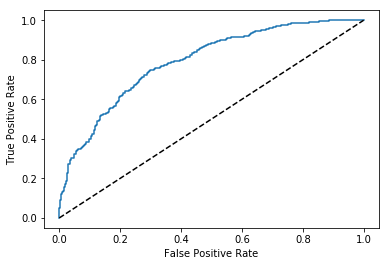

In [25]:
import matplotlib.pyplot as plt

# import scikitplot as skplt
# y_probas = lrc.predict_proba(X_test)
# skplt.metrics.plot_roc_curve(y_test, y_probas)
# plt.show()

y_probas = lrc.predict_proba(X_test)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_probas[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()